# Collocations

In [18]:
import nltk
from nltk.corpus import brown, treebank

%matplotlib inline

In [5]:
def collocate(corpus, adj):
    return nltk.FreqDist([w2 for (w1,t1),(w2,t2) in nltk.bigrams(corpus.tagged_words()) 
                                                                 if w1.upper() == adj.upper() and
                                                                    t1.startswith('JJ') and
                                                                    t2.startswith('NN')]) 


In [6]:
collocate(brown, 'strong').most_common(10)

[('stress', 11),
 ('hands', 7),
 ('opposition', 3),
 ('men', 3),
 ('arm', 2),
 ('pressures', 2),
 ('oil', 2),
 ('point', 2),
 ('feeling', 2),
 ('woman', 2)]

In [7]:
collocate(brown, 'powerful').most_common(10)

[('engines', 2),
 ('arms', 2),
 ('transmitter', 1),
 ('man', 1),
 ('nations', 1),
 ('nation', 1),
 ('mirror', 1),
 ('efforts', 1),
 ('weapon', 1),
 ('glasses', 1)]

In [10]:
collocate(treebank, 'strong').most_common(10)

[('growth', 2),
 ('interest', 1),
 ('tradition', 1),
 ('yen', 1),
 ('evidence', 1),
 ('dividend', 1),
 ('periods', 1),
 ('warning', 1),
 ('stand', 1),
 ('cash', 1)]

In [11]:
collocate(treebank, 'powerful').most_common(10)

[('Hawaii', 1), ('machinists', 1)]

---

## Regular expressions

In [13]:
import re

In [14]:
re.findall(r'[aeiou]', 'San Diego State University')

['a', 'i', 'e', 'o', 'a', 'e', 'i', 'e', 'i']

In [15]:
re.findall(r'[AEIOUaeiou]', 'San Diego State University')

['a', 'i', 'e', 'o', 'a', 'e', 'U', 'i', 'e', 'i']

In [16]:
set(re.findall(r'[AEIOUaeiou]', 'San Diego State University'))

{'U', 'a', 'e', 'i', 'o'}

In [17]:
nltk.FreqDist(re.findall(r'[AEIOUaeiou]', 'San Diego State University'))

FreqDist({'U': 1, 'a': 2, 'e': 3, 'i': 3, 'o': 1})

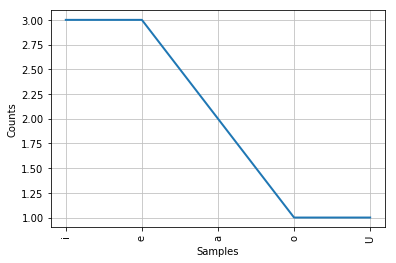

In [19]:
f = nltk.FreqDist(re.findall(r'[AEIOUaeiou]', 'San Diego State University'))
f.plot()

In [25]:
re.findall(r'[AEIOUaeiou]+', 'San Diego State University')

['a', 'ie', 'o', 'a', 'e', 'U', 'i', 'e', 'i']

In [26]:
re.findall(r'[AEIOUaeiou]+', 'San Diego State UUUUUUUUUUUUUUUniversity')

['a', 'ie', 'o', 'a', 'e', 'UUUUUUUUUUUUUUU', 'i', 'e', 'i']

In [27]:
vocab = nltk.corpus.words.words('en-basic')

In [28]:
len(vocab)

850

In [29]:
[w for w in vocab if w.startswith('th')]

['than',
 'that',
 'the',
 'then',
 'theory',
 'there',
 'thick',
 'thin',
 'thing',
 'this',
 'though',
 'thought',
 'thread',
 'throat',
 'through',
 'thumb',
 'thunder']

In [30]:
[w for w in vocab if re.search(r'th', w)]

['authority',
 'bath',
 'birth',
 'breath',
 'brother',
 'cloth',
 'death',
 'earth',
 'father',
 'feather',
 'growth',
 'healthy',
 'leather',
 'month',
 'mother',
 'mouth',
 'north',
 'other',
 'rhythm',
 'smooth',
 'south',
 'than',
 'that',
 'the',
 'then',
 'theory',
 'there',
 'thick',
 'thin',
 'thing',
 'this',
 'though',
 'thought',
 'thread',
 'throat',
 'through',
 'thumb',
 'thunder',
 'together',
 'tooth',
 'weather',
 'with']

In [31]:
[w for w in vocab if re.search(r'^th', w)]

['than',
 'that',
 'the',
 'then',
 'theory',
 'there',
 'thick',
 'thin',
 'thing',
 'this',
 'though',
 'thought',
 'thread',
 'throat',
 'through',
 'thumb',
 'thunder']

In [32]:
[w for w in vocab if re.search(r'th$', w)]

['bath',
 'birth',
 'breath',
 'cloth',
 'death',
 'earth',
 'growth',
 'month',
 'mouth',
 'north',
 'smooth',
 'south',
 'tooth',
 'with']

In [35]:
[w for w in vocab if re.search(r'.th.', w)]

['authority',
 'brother',
 'father',
 'feather',
 'healthy',
 'leather',
 'mother',
 'other',
 'rhythm',
 'together',
 'weather']

In [36]:
[w for w in vocab if re.search(r'^th.*h$', w)]

['though', 'through']

In [37]:
[w for w in vocab if re.search(r'$th.*h^', w)]

[]

In [38]:
[w for w in vocab if re.search(r'[aeiou][aeiou][aeiou]', w)]

['beautiful', 'behaviour', 'conscious', 'quiet', 'serious']

In [43]:
[v for v in re.findall(r'[aeiou]+',vocab[10].lower())]

['a', 'e', 'i', 'e', 'e']

In [44]:
set([v for w in vocab 
       for v in re.findall(r'[aeiou]+',w.lower())])

{'a',
 'ai',
 'au',
 'e',
 'ea',
 'eau',
 'ee',
 'ei',
 'eo',
 'i',
 'ia',
 'ie',
 'io',
 'iou',
 'o',
 'oa',
 'oe',
 'oi',
 'oo',
 'ou',
 'u',
 'ua',
 'ue',
 'ui',
 'uie'}

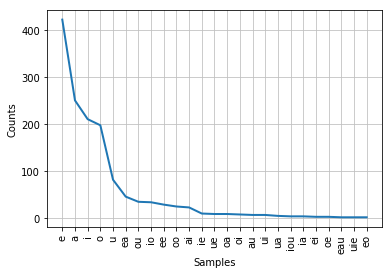

In [47]:
fd = nltk.FreqDist([v for w in vocab 
       for v in re.findall(r'[aeiou]+',w.lower())])
fd.plot()

In [48]:
fd.tabulate()

  e   a   i   o   u  ea  ou  io  ee  oo  ai  ie  ue  oa  oi  au  ui  ua iou  ia  ei  oe eau uie  eo 
422 250 210 197  81  45  34  33  28  24  22   9   8   8   7   6   6   4   3   3   2   2   1   1   1 


In [49]:
treebank_text = nltk.Text(treebank.words())

In [ ]:
treebank_text.findall(r'<.*th>')